In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import os 
os.getcwd()

'C:\\Users\\ksvg7\\Desktop\\PGA44\\ML\\Decision Tree\\Class Notes'

In [5]:
cars_train=pd.read_csv(r"C:\Users\ksvg7\Desktop\PGA44\ML\Decision Tree\cars_train.csv",header=None)
cars_test=pd.read_csv(r"C:\Users\ksvg7\Desktop\PGA44\ML\Decision Tree\cars_test.csv",header=None)

In [7]:
cars_train

,0,1,2,3,4,5,6
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good
...,...,...,...,...,...,...,...
1377,low,vhigh,5more,4,big,med,acc
1378,low,vhigh,3,more,med,low,unacc
1379,high,vhigh,5more,4,med,high,unacc
1380,med,med,4,4,big,low,unacc


In [9]:
cars_test

,0,1,2,3,4,5,6
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good
...,...,...,...,...,...,...,...
341,high,low,3,4,small,high,acc
342,vhigh,high,3,4,small,high,unacc
343,med,low,3,2,small,high,unacc
344,vhigh,med,2,more,small,low,unacc


### Changing column names

In [11]:
cars_train.columns=['buying','maint','doors','persons','lug_boot','safety','classes']

In [13]:
cars_test.columns=['buying','maint','doors','persons','lug_boot','safety','classes']

In [15]:
cars_train

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good
...,...,...,...,...,...,...,...
1377,low,vhigh,5more,4,big,med,acc
1378,low,vhigh,3,more,med,low,unacc
1379,high,vhigh,5more,4,med,high,unacc
1380,med,med,4,4,big,low,unacc


In [17]:
cars_test

,buying,maint,doors,persons,lug_boot,safety,classes
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good
...,...,...,...,...,...,...,...
341,high,low,3,4,small,high,acc
342,vhigh,high,3,4,small,high,unacc
343,med,low,3,2,small,high,unacc
344,vhigh,med,2,more,small,low,unacc


### Concating both Train and Test Data

In [21]:
df=pd.concat([cars_train,cars_test],axis=0,ignore_index=True)
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good


In [23]:
df.shape

(1728, 7)

In [25]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   classes   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [29]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
classes     object
dtype: object

In [31]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
classes     4
dtype: int64

In [33]:
for i in df.columns:
    print("\n**",i,":",df[i].unique())


** buying : ['vhigh' 'low' 'high' 'med']

** maint : ['high' 'vhigh' 'med' 'low']

** doors : ['3' '5more' '4' '2']

** persons : ['more' '4' '2']

** lug_boot : ['small' 'big' 'med']

** safety : ['low' 'med' 'high']

** classes : ['unacc' 'good' 'vgood' 'acc']


In [35]:
df['classes'].value_counts()

classes
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [37]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,high,3,more,small,low,unacc
freq,432,432,432,576,576,576,1210


In [39]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

### Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["buying"]=le.fit_transform(df["buying"])

In [45]:
df["buying"]

0       3
1       1
2       1
3       0
4       1
       ..
1723    0
1724    3
1725    2
1726    3
1727    3
Name: buying, Length: 1728, dtype: int32

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    print(i)
    df[i]=le.fit_transform(df[i])

buying
maint
doors
persons
lug_boot
safety
classes


In [49]:
df

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,0,1,2,2,1,2
1,1,3,1,1,2,2,2
2,1,0,3,2,0,1,2
3,0,2,2,0,2,2,2
4,1,1,1,2,0,2,1
...,...,...,...,...,...,...,...
1723,0,1,1,1,2,0,0
1724,3,0,1,1,2,0,2
1725,2,1,1,0,2,0,2
1726,3,2,0,2,2,1,2


In [52]:
# Data Splitting in Depertment and Independent Variable
X=df.drop('classes',axis=1)
Y=df['classes']

In [58]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,0,1,2,2,1
1,1,3,1,1,2,2
2,1,0,3,2,0,1
3,0,2,2,0,2,2
4,1,1,1,2,0,2


In [54]:
X.shape

(1728, 6)

In [56]:
Y.shape

(1728,)

In [60]:
Y.head()

0    2
1    2
2    2
3    2
4    1
Name: classes, dtype: int32

### Train Test Spliting of Cars Data

In [62]:
from sklearn .model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=10)

In [64]:
X_train.shape

(1209, 6)

In [66]:
Y_train.shape

(1209,)

In [68]:
X_test.shape

(519, 6)

In [70]:
Y_test.shape

(519,)

### Model Building

In [72]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(criterion="entropy")

In [74]:
# Fitting the Model
dct.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
# predicting by the model built
Y_train_pred=dct.predict(X_train)
Y_test_pred=dct.predict(X_test)

In [78]:
Y.value_counts()

classes
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

### Model Evaluation

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print("train data perfomance","\n",classification_report(Y_train,Y_train_pred))
print("test data perfomance","\n",classification_report(Y_test,Y_test_pred))

train data perfomance 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00       855
           3       1.00      1.00      1.00        38

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

test data perfomance 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.86      0.86      0.86        28
           2       0.99      1.00      0.99       355
           3       0.86      0.89      0.87        27

    accuracy                           0.97       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.97      0.97      0.97       519



In [83]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes'], dtype='object')

In [85]:
df.columns[-1]

'classes'

In [87]:
df1=df.drop("classes",axis=1)

### Plot the Decission Tree

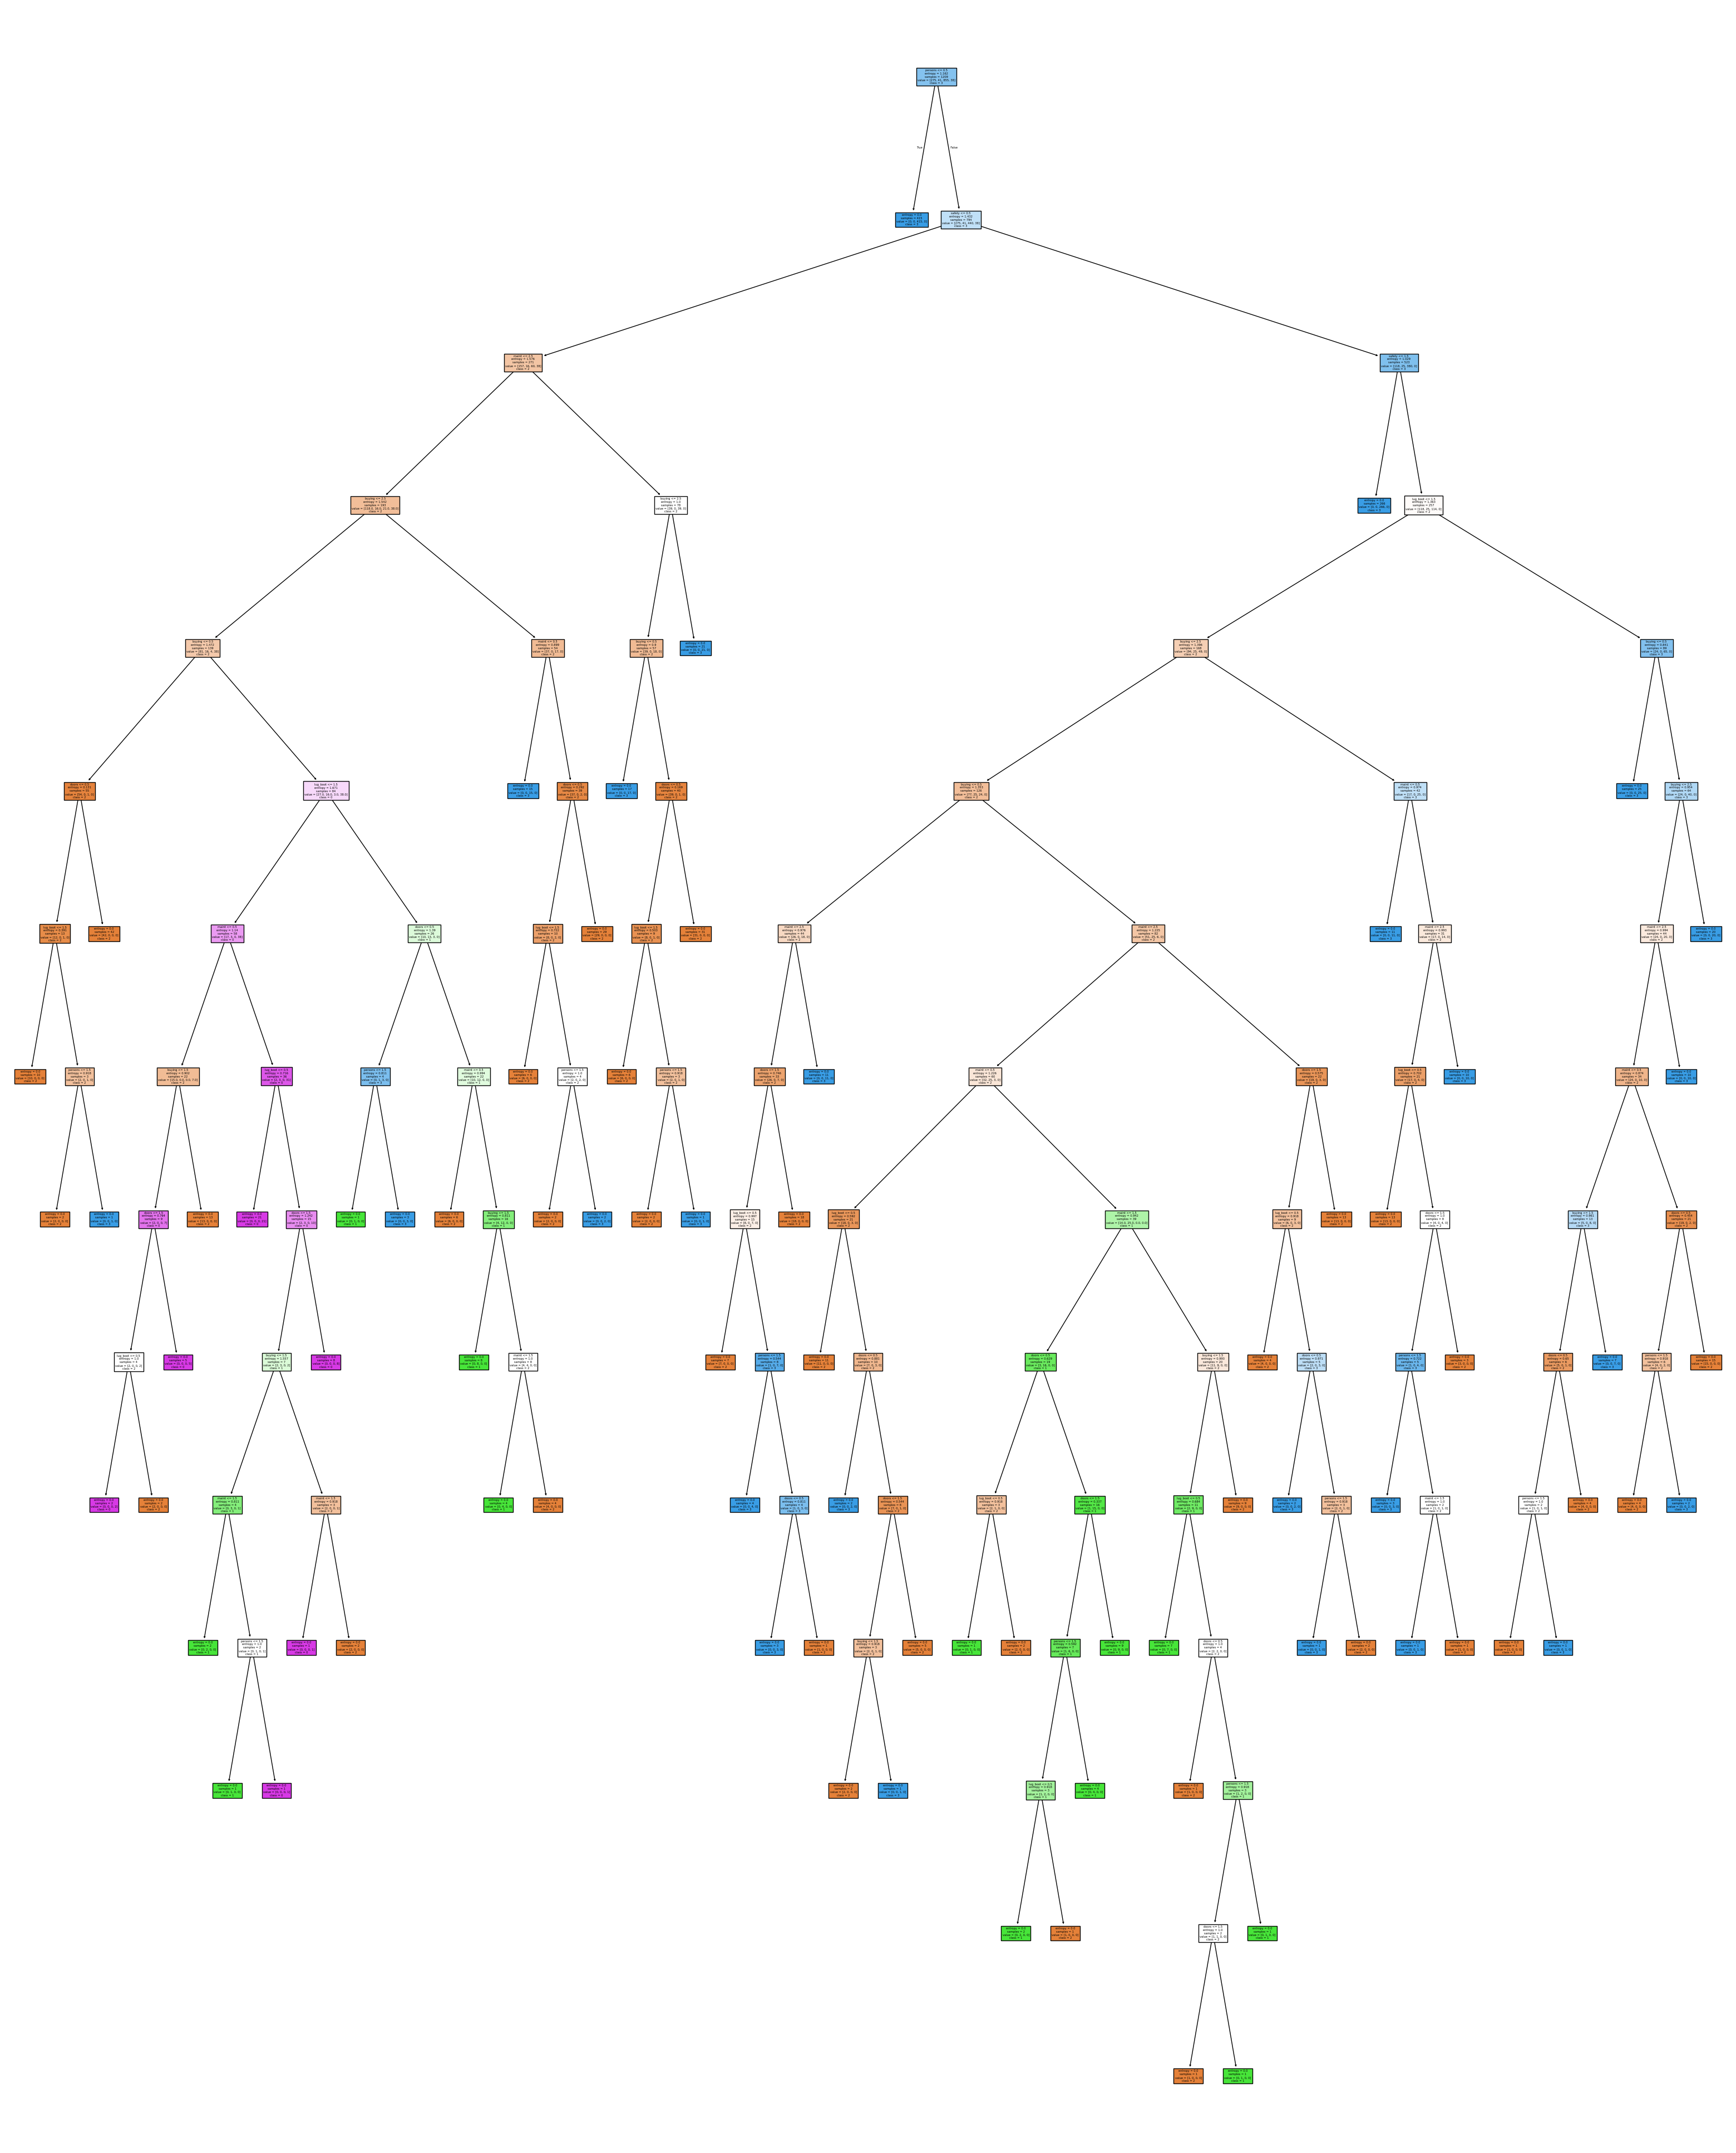

In [90]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,50))     # adjust the fig size if necessary
plot_tree(dct,filled=True,feature_names=df.drop('classes',axis=1).columns,
          class_names=df['classes'].unique().astype(str))
plt.show()

## HYPERPARAMETER TUNING

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.05]  # pruning parameter
}

# 2. Initialize Decision Tree & GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# 3. Fit on training data
grid.fit(X_train, Y_train)

print("✅ Best Hyperparameters:", grid.best_params_)
print("✅ Best CV Score (f1_macro):", grid.best_score_)

# 4. Get the best model
best_model = grid.best_estimator_

# 5. Predictions
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# 6. Evaluation
print("\n📊 Train Data Performance\n", classification_report(Y_train, Y_train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(Y_train, Y_train_pred))

print("\n📊 Test Data Performance\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(Y_test, Y_test_pred))


✅ Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Best CV Score (f1_macro): 0.9011083290953653

📊 Train Data Performance
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00       855
           3       1.00      1.00      1.00        38

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Confusion Matrix (Train):
 [[275   0   0   0]
 [  0  41   0   0]
 [  0   0 855   0]
 [  0   0   0  38]]

📊 Test Data Performance
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       109
           1       0.86      0.89      0.88        28
           2       1.00      1.00      1.00       355
           

### Plot The Decision Tree

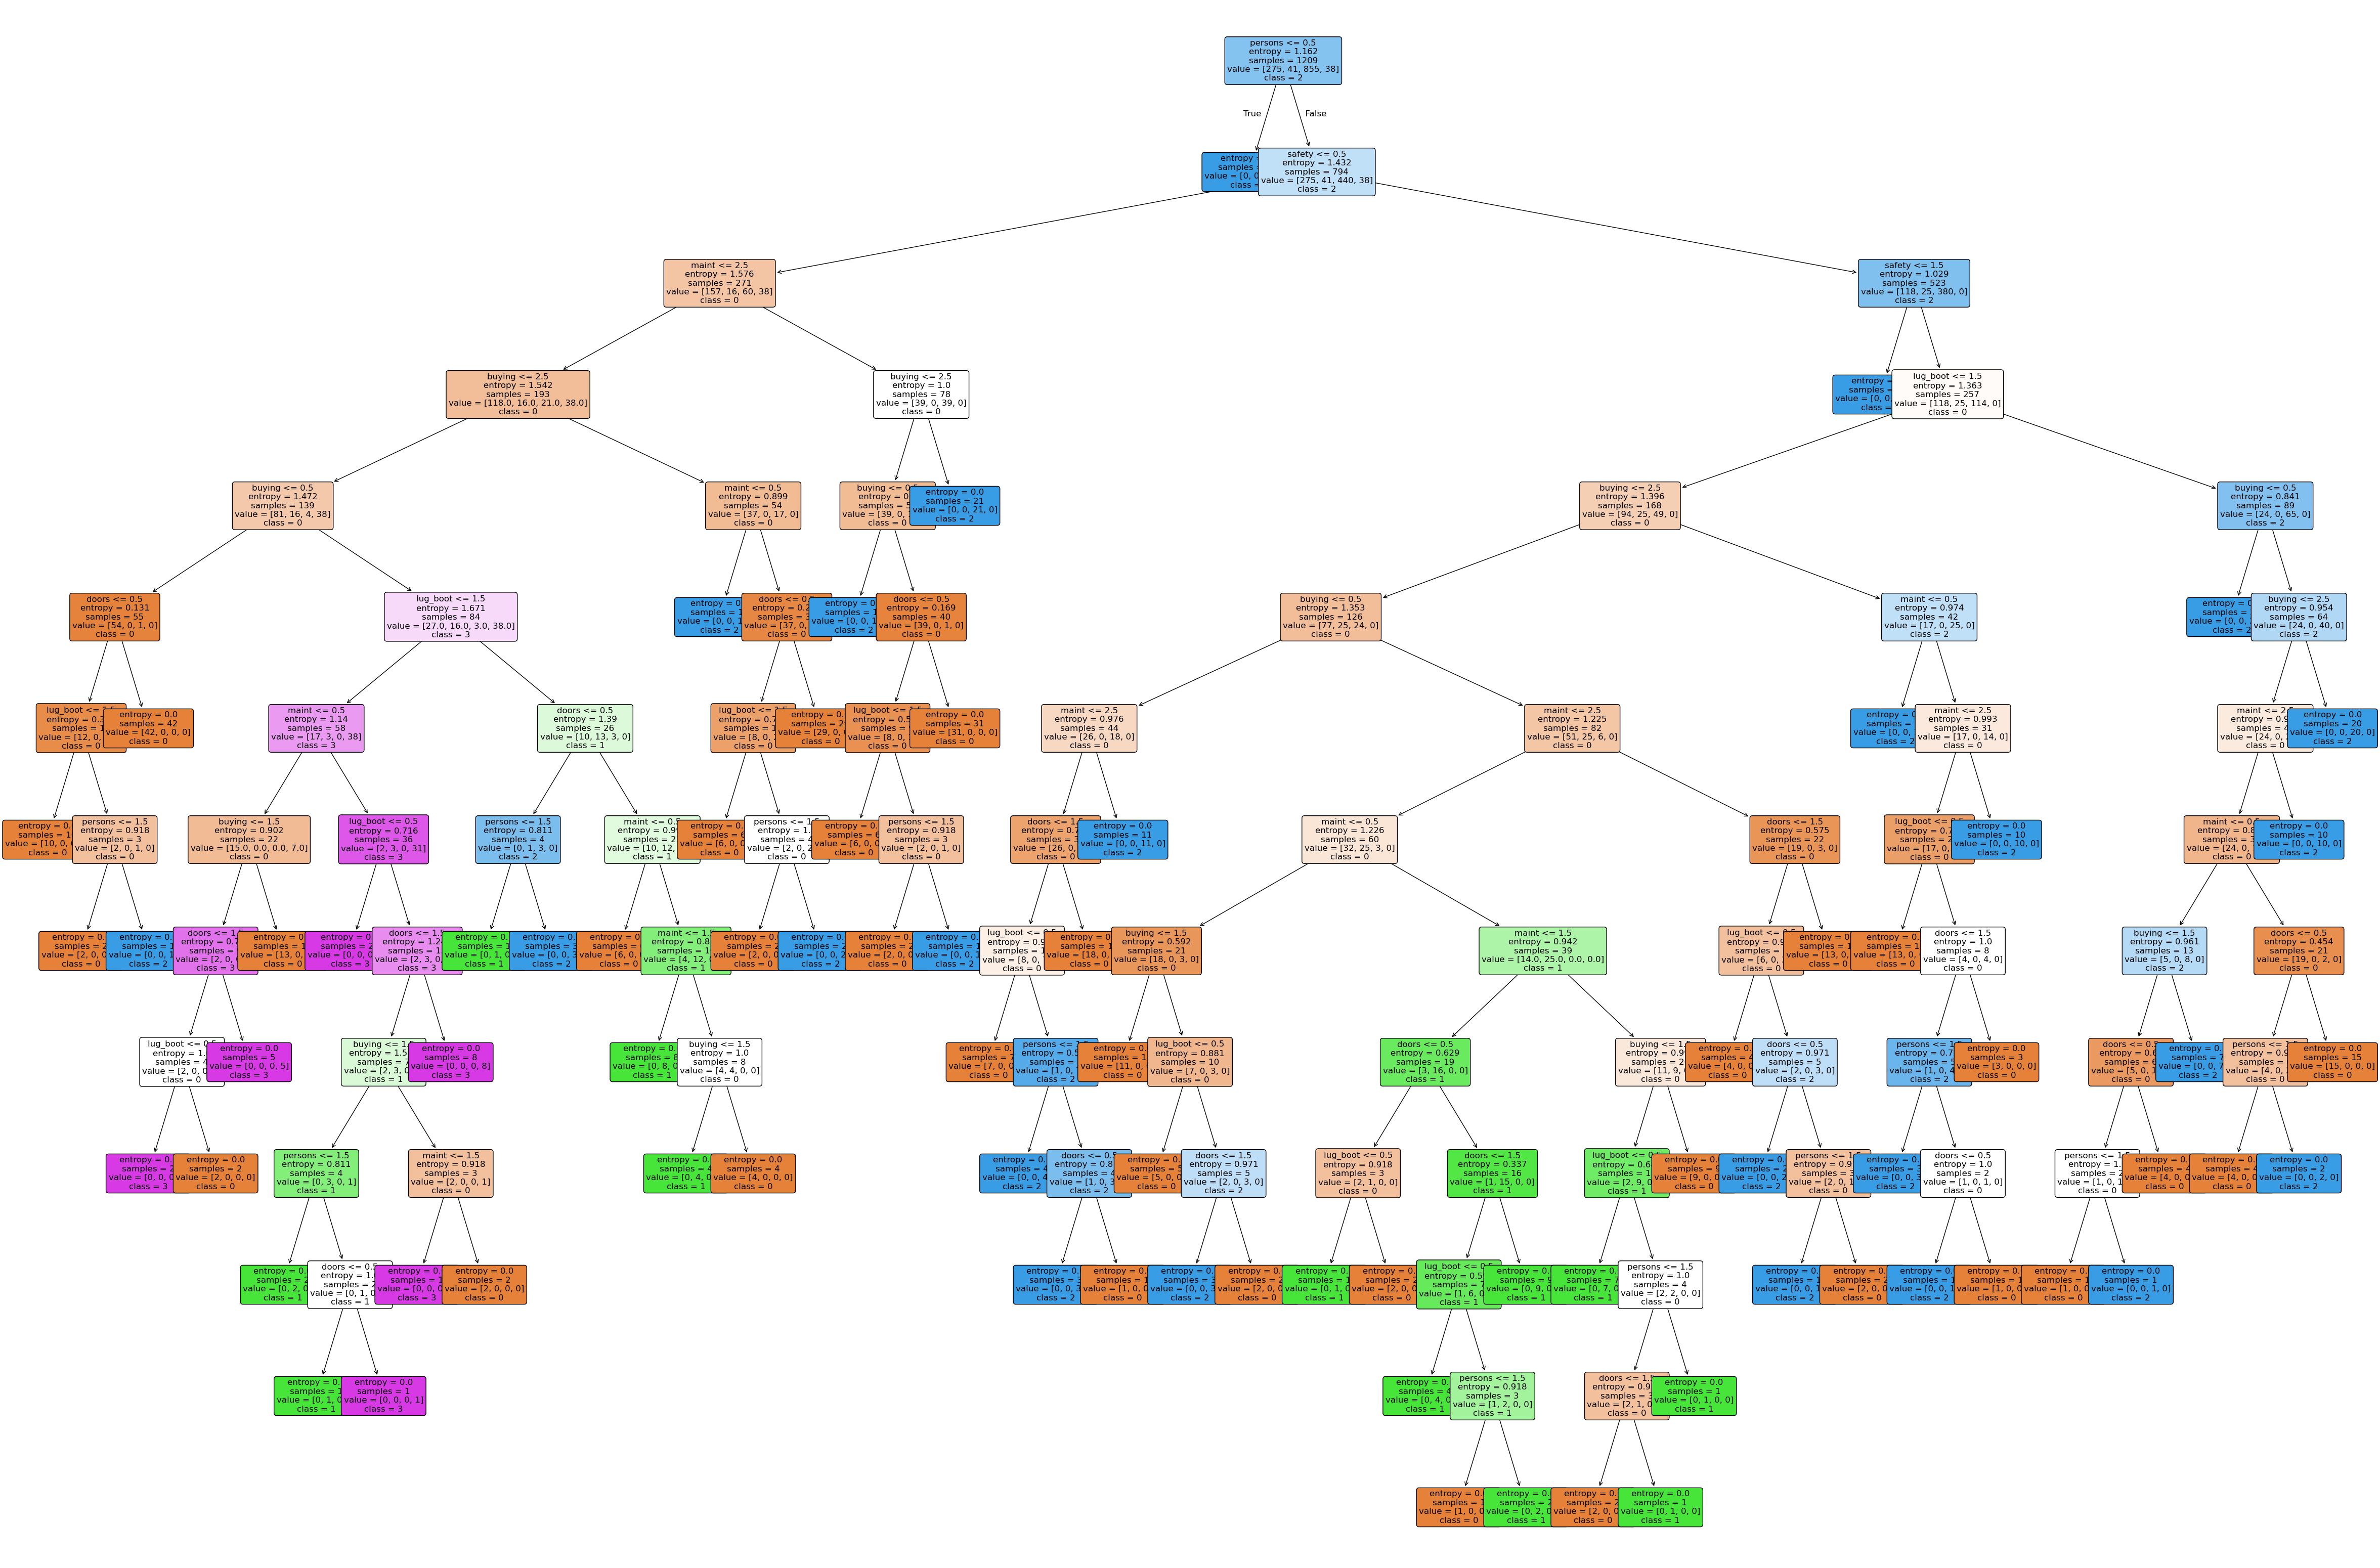

In [129]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming best_model is your tuned Decision Tree
plt.figure(figsize=(60,40))
plot_tree(best_model, 
          feature_names=X_train.columns,  # your feature names
          class_names=[str(cls) for cls in best_model.classes_],  # class labels
          filled=True,      # color by class
          rounded=True,     # rounded boxes
          fontsize=12)
plt.show()


In [119]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00       855
           3       1.00      1.00      1.00        38

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [121]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       109
           1       0.86      0.89      0.88        28
           2       1.00      1.00      1.00       355
           3       0.89      0.93      0.91        27

    accuracy                           0.98       519
   macro avg       0.93      0.94      0.94       519
weighted avg       0.98      0.98      0.98       519



In [123]:
model_DecisionTree.score(X_train,Y_train)

0.8569065343258891